## Lab 1

### Part 1

### Import Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import random
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA    
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.cluster import KMeans
import numpy as np

from random import randint
from time import sleep

In [2]:
#attribute url
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [3]:
#get request
response = requests.get(url)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
#divide the different criteria into a different lists to be put into our final dataframe

artist = []
song = []
genre = []
year = []

num_iter = len("body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper > div.feed-item")

songart = soup.select("body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper > div.feed-item")
genlist = soup.select("body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper > div.feed-item > div.chart-content")
yearlist = soup.select("body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper > div.feed-item > div.chart-content > ul > li:nth-child(2)")

for i in range(num_iter):
    artist.append(songart[i].em.get_text())
    song.append(songart[i].cite.get_text())
    year.append(yearlist[i].get_text())    
    try:
        genre.append(genlist[i].ul.li.a.get_text())
    except:
        genre.append('Unknown')

    

In [6]:
#Attribute the lists to a dataframe

top100 = pd.DataFrame({'artist':artist
                    ,'track':song
                    ,'genre':genre
                    ,'year':year})

In [7]:
top100

artist                                   track        genre  \
0         John Rich                                Progress  New Release   
1         Kate Bush  Running Up That Hill (A Deal with God)          Pop   
2             Lizzo                         About Damn Time          Pop   
3        Luke Combs                The Kind of Love We Make      Country   
4      Harry Styles                               As It Was          Pop   
..              ...                                     ...          ...   
95    One Direction                           Night Changes          Pop   
96       Luke Combs                              Doin' This      Country   
97    Morgan Wallen                         Whiskey Glasses      Country   
98     David Morris                      Carrying Your Love      Country   
99  Imagine Dragons                                  Demons  Alternative   

                               year  
0                    Genre: Country  
1      Release Date: August 5, 1985  
2      Release Date: April 14, 2022  
3       Release Date: June 16, 2022  
4      Release Date: March 31, 2022  
..                              ...  
95  Release Date: November 17, 2014  
96  Release Date: November 10, 2021  
97    Release Date: January 1, 2016  
98       Release Date: June 1, 2022  
99  Release Date: February 14, 2012  

[100 rows x 4 columns]

In [8]:
#In the year column we have a Genre: leak. We will split these genres...  

def genresplit(value):
    if 'Genre:' in value:
        name = value.split('Genre: ')[1]
        
        return name
    else:
        return value

In [9]:
#...move these genres 
top100['genre'] = top100['genre'].apply(genresplit)
top100['year'] = top100['year'].apply(genresplit)

In [10]:
def tidy(value):

    type1 = value['genre']
    type2 = value['year']
    if str(type1) == 'New Release':
        return type2
    else:
        return type1

    
top100['genre'] = top100.apply(tidy,axis=1)

In [11]:
#finally split the year column by the comma and find the year value. "Nan" values filled with 2022, because it was originally a "New Release" value
top100['year'] = top100['year'].str.split(", ", n = 1, expand = True)[1]
top100['year'] = top100['year'].fillna(2022)
top100['track'] = top100['track'].str.strip()

In [12]:
top100

artist                                   track        genre  year
0         John Rich                                Progress      Country  2022
1         Kate Bush  Running Up That Hill (A Deal with God)          Pop  1985
2             Lizzo                         About Damn Time          Pop  2022
3        Luke Combs                The Kind of Love We Make      Country  2022
4      Harry Styles                               As It Was          Pop  2022
..              ...                                     ...          ...   ...
95    One Direction                           Night Changes          Pop  2014
96       Luke Combs                              Doin' This      Country  2021
97    Morgan Wallen                         Whiskey Glasses      Country  2016
98     David Morris                      Carrying Your Love      Country  2022
99  Imagine Dragons                                  Demons  Alternative  2012

[100 rows x 4 columns]

### Part 2

In [13]:
urls = "https://spinditty.com/playlists/100songs"

In [14]:
responses = requests.get(urls)
responses.status_code

200

In [15]:
sopa = BeautifulSoup(responses.content, "html.parser")

In [16]:
##attribute different values to song, artist, genre and year lists. 

songartist2 = []
genre2 = []
years2 = []
num_iter = len("body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper > div.feed-item")

songarts = sopa.select("body > phoenix-page > div > div > div.m-page > section > article > div > div > section > div > div > h2")
genres = sopa.select("body > phoenix-page > div > div > div.m-page > section > article > div > div > section > div > div > p")
years = sopa.select("body > phoenix-page > div > div > div.m-page > section > article > div > div > section > div > div > h3")
for i in range(len(songarts)):
    songartist2.append(songarts[i].get_text())
    
for i in range(len(genres)):
    genre2.append(genres[i].get_text())
        
for i in range(len(years)):
    years2.append(years[i].get_text())


In [17]:
##find genre in text. 

genrefin = []
for i in genre2:
    if 'Genre:' in i:
        genrefin.append(i)
    elif 'GENRE:' in i:
        genrefin.append(i)

        
##filter any unneeded rows. 

songartfin = []        
for j in songartist2:
    if '#' in j:
        songartfin.append(j)
        

#treat values longer than years
lap = []
for i in years2:
    if len(i) > 4:
        i = re.findall('\d{4}',i)
        lap.append(i)
    else:
        lap.append(i)
years2 = lap

In [18]:
#drop any duplicates, then create the dataframe for table2 

top100s = pd.DataFrame({'go':songartfin})
top100s = top100s.drop_duplicates().reset_index()
top100s = pd.DataFrame({'go': top100s['go'], 'genre':genrefin, 'year':years2})

In [19]:
top100s

go  \
0         #100 - "Bitter Sweet Symphony" by The Verve   
1   #99: "For What It's Worth" by Buffalo Springfield   
2                 #98 "Fire and Rain" by James Taylor   
3                 #97: "Rolling in the Deep" by Adele   
4   #96 "(We're Gonna) Rock Around the Clock" by B...   
..                                                ...   
95                           #5: "Stairway to Heaven"   
96                       #4: "Imagine" by John Lennon   
97            #3: "Like a Rolling Stone" by Bob Dylan   
98                     #2: "Yesterday" by The Beatles   
99               #1: "Johnny B. Goode" by Chuck Berry   

                      genre    year  
0            Genre: Britpop  [1997]  
1          Genre: Folk Rock    1967  
2          Genre: Folk Rock  [1970]  
3                Genre: Pop  [2011]  
4        Genre: Rock & Roll    1954  
..                      ...     ...  
95              Genre: Rock  [1971]  
96              Genre: Rock  [1971]  
97         Genre: Folk Rock  [1965]  
98  Genre: British Invasion  [1965]  
99       Genre: Rock & Roll  [1959]  

[100 rows x 3 columns]

In [20]:
#determine artist, genre and track columns, as well as year cleaning. 

top100s['track'] = top100s['go'].str.split("by", n = 1, expand = True)[0]
top100s['artist'] = top100s['go'].str.split("by", n = 1, expand = True)[1]
top100s['track'] = top100s['track'].str.split('"', n = 1, expand = True)[1]
top100s['genre'] = top100s['genre'].str.split(': ', n = 1, expand = True)[1]
top100s['track'] = top100s['track'].str.replace('"','')

yearconvert = []

#if it's a list:
for i in top100s['year']:
    if isinstance(i,list):
        yearconvert.append(i[0])
    else:
        yearconvert.append(i)

top100s['year'] = yearconvert

top100s['track'] = top100s['track'].str.strip()

In [21]:
top100s = top100s[['track','artist','genre','year']]

In [22]:
top100s

track                      artist  \
0                 Bitter Sweet Symphony                   The Verve   
1                   For What It's Worth         Buffalo Springfield   
2                         Fire and Rain                James Taylor   
3                   Rolling in the Deep                       Adele   
4   (We're Gonna) Rock Around the Clock   Bill Haley and His Comets   
..                                  ...                         ...   
95                   Stairway to Heaven                        None   
96                              Imagine                 John Lennon   
97                 Like a Rolling Stone                   Bob Dylan   
98                            Yesterday                 The Beatles   
99                      Johnny B. Goode                 Chuck Berry   

               genre  year  
0            Britpop  1997  
1          Folk Rock  1967  
2          Folk Rock  1970  
3                Pop  2011  
4        Rock & Roll  1954  
..               ...   ...  
95              Rock  1971  
96              Rock  1971  
97         Folk Rock  1965  
98  British Invasion  1965  
99       Rock & Roll  1959  

[100 rows x 4 columns]

In [23]:
#concatenate into one table
top100s = top100s[['track','artist','genre','year']]
top100 = top100[['track','artist','genre','year']]
top = pd.concat([top100,top100s], axis = 0).reset_index()
top = top.drop(columns='index')

In [24]:
top

track        artist             genre  \
0                                  Progress     John Rich           Country   
1    Running Up That Hill (A Deal with God)     Kate Bush               Pop   
2                           About Damn Time         Lizzo               Pop   
3                  The Kind of Love We Make    Luke Combs           Country   
4                                 As It Was  Harry Styles               Pop   
..                                      ...           ...               ...   
195                      Stairway to Heaven          None              Rock   
196                                 Imagine   John Lennon              Rock   
197                    Like a Rolling Stone     Bob Dylan         Folk Rock   
198                               Yesterday   The Beatles  British Invasion   
199                         Johnny B. Goode   Chuck Berry       Rock & Roll   

     year  
0    2022  
1    1985  
2    2022  
3    2022  
4    2022  
..    ...  
195  1971  
196  1971  
197  1965  
198  1965  
199  1959  

[200 rows x 4 columns]

In [25]:
top.to_csv('top.csv', index = False)

## Lab 2

In [26]:
def musicrecommender():
    song = input("Name of your song: ")    
    if song in list(top['track']):
        print(top['track'].iloc[random.randint(0,200)])    
    elif song not in list(top['track']):
        print("Sorry, we cannot recommend any songs")

In [27]:
musicrecommender()

Name of your song: TV
Let's Stay Together


## Lab 3

Import the spotipy library and access account

In [28]:
secrets_file = open("secrets.txt","r")

In [ ]:
string = secrets_file.read()
string.split('\n')

In [30]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [31]:
#InitializeSpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

Use Jan's code to get the playlist information (these playlists come from my own account). I had to put them into two lists, as the maximum space that spotify permits is 9999 in one. 

In [32]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [33]:
playlist1 = get_playlist_tracks("6tIxyT1Gq6O7DK7rIEUEZo")
playlist2 = get_playlist_tracks("4pbDDX7np7Q1H0ghL7U9o7")

Here we see that the total songs (with duplicates, probably) is  

In [34]:
print('no. 1    ',len(playlist1))
print('no. 2    ',len(playlist2))
print('total is',len(playlist1)+len(playlist2))

no. 1     9999
no. 2     3878
total is 13877


Create a function to extract all necessary information from the dictionaries (and apply)

In [35]:
def artistsong(pops):
    artist = []
    song = []
    features = []
    counter = 0
    for i in pops:
        song.append(pops[counter]['track']['name'])
        artist.append(pops[counter]['track']['artists'][0]['name'])
        features.append(sp.audio_features(pops[counter]["track"]["uri"]))
        counter += 1
    return pd.DataFrame({'artist': artist, 'song': song, 'features': features})


In [36]:
%%time
playlist1df = artistsong(playlist1)

Expected id of type track but found type A%C3%AFcha spotify:local:Khaled:Sahra:A%C3%AFcha:259
Expected id of type track but found type Kids+In+America spotify:local:Kim+Wilde:Simply+The+Best+Of+The+80%27s:Kids+In+America:202
Expected id of type track but found type La+Bamba spotify:local:Los+Lobos:The+Best+Latino+Carnival+In+The+World+...+Ever%21+%28Disc+1%29:La+Bamba:171
Expected id of type track but found type Live+Is+Life spotify:local:Opus:Simply+The+Best+Of+The+80%27s:Live+Is+Life:244
Expected id of type track but found type All+Night+Long spotify:local:Lionel+Richie:Can%27t+Slow+Down:All+Night+Long:379
Expected id of type track but found type %28Keep+Feeling%29+Fascination spotify:local:The+Human+League:Grand+Theft+Auto%3A+Vice+City%2C+Vol.+2%3A+Wave+103:%28Keep+Feeling%29+Fascination:222
Expected id of type track but found type More+Than+This spotify:local:Roxy+Music:Grand+Theft+Auto%3A+Vice+City%2C+Vol.+3%3A+Emotion+98.3:More+Than+This:266
Expected id of type track but found ty

CPU times: user 1min 37s, sys: 17.8 s, total: 1min 55s
Wall time: 14min 43s


In [37]:
%%time
playlist2df = artistsong(playlist2)

CPU times: user 42.5 s, sys: 7.73 s, total: 50.2 s
Wall time: 5min 47s


Our dataframes look like this. The only problem is that the upis are not unpacked yet. We will deal with that now

In [38]:
playlist1df

artist                                          song  \
0          Queen             A Kind Of Magic - Remastered 2011   
1          Queen           Bohemian Rhapsody - Remastered 2011   
2          Queen  Another One Bites The Dust - Remastered 2011   
3          Queen           Don't Stop Me Now - Remastered 2011   
4          Queen              Under Pressure - Remastered 2011   
...          ...                                           ...   
9994  Kip Winger         California - From the Moon to the Sun   
9995  Kip Winger        What We Are - From the Moon to the Sun   
9996  Kip Winger       One Big Game - From the Moon to the Sun   
9997  Kip Winger                Why - From the Moon to the Sun   
9998  Kip Winger  Reason to Believe - From the Moon to the Sun   

                                               features  
0     [{'danceability': 0.67, 'energy': 0.776, 'key'...  
1     [{'danceability': 0.414, 'energy': 0.404, 'key...  
2     [{'danceability': 0.933, 'energy': 0.528, 'key...  
3     [{'danceability': 0.559, 'energy': 0.868, 'key...  
4     [{'danceability': 0.671, 'energy': 0.712, 'key...  
...                                                 ...  
9994  [{'danceability': 0.517, 'energy': 0.444, 'key...  
9995  [{'danceability': 0.476, 'energy': 0.721, 'key...  
9996  [{'danceability': 0.542, 'energy': 0.7, 'key':...  
9997  [{'danceability': 0.27, 'energy': 0.561, 'key'...  
9998  [{'danceability': 0.652, 'energy': 0.825, 'key...  

[9999 rows x 3 columns]

In [39]:
playlist2df

artist                        song  \
0             ANGRA              Live and Learn   
1             ANGRA              Bleeding Heart   
2             ANGRA            Hunters and Prey   
3             ANGRA              Eyes of Christ   
4             ANGRA  Rebirth (Acoustic Version)   
...             ...                         ...   
3873  Fleetwood Mac                  Family Man   
3874  Fleetwood Mac  Welcome To The Room...Sara   
3875  Fleetwood Mac           Isn't It Midnight   
3876  Fleetwood Mac        When I See You Again   
3877  Fleetwood Mac          You And I, Part II   

                                               features  
0     [{'danceability': 0.431, 'energy': 0.984, 'key...  
1     [{'danceability': 0.5, 'energy': 0.545, 'key':...  
2     [{'danceability': 0.56, 'energy': 0.892, 'key'...  
3     [{'danceability': 0.512, 'energy': 0.937, 'key...  
4     [{'danceability': 0.348, 'energy': 0.596, 'key...  
...                                                 ...  
3873  [{'danceability': 0.688, 'energy': 0.644, 'key...  
3874  [{'danceability': 0.632, 'energy': 0.555, 'key...  
3875  [{'danceability': 0.469, 'energy': 0.73, 'key'...  
3876  [{'danceability': 0.544, 'energy': 0.0907, 'ke...  
3877  [{'danceability': 0.69, 'energy': 0.627, 'key'...  

[3878 rows x 3 columns]

First we normalise using the json_normalize() function, then we apply them to individual columns and convert them to a dataframe.

In [40]:
playlist1df['features'] = json_normalize(playlist1df['features'])
playlist2df['features'] = json_normalize(playlist2df['features'])

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_13737/962824347.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  playlist1df['features'] = json_normalize(playlist1df['features'])
/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_13737/962824347.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  playlist2df['features'] = json_normalize(playlist2df['features'])


In [41]:
playlist1features = pd.DataFrame.from_records(playlist1df.features.dropna().tolist())
playlist2features = pd.DataFrame.from_records(playlist2df.features.dropna().tolist())

We concat these dataframes and drop our features column (it has now been unpacked) 

In [42]:
playlist1df = playlist1df.reset_index(drop = True)
playlist1features = playlist1features.reset_index(drop = True)
playlist_db1 = pd.concat([playlist1df,playlist1features], axis = 1)
playlist_db1 = playlist_db1.drop(columns = 'features')
playlist_db1 

artist                                          song  danceability  \
0          Queen             A Kind Of Magic - Remastered 2011         0.670   
1          Queen           Bohemian Rhapsody - Remastered 2011         0.414   
2          Queen  Another One Bites The Dust - Remastered 2011         0.933   
3          Queen           Don't Stop Me Now - Remastered 2011         0.559   
4          Queen              Under Pressure - Remastered 2011         0.671   
...          ...                                           ...           ...   
9994  Kip Winger         California - From the Moon to the Sun         0.517   
9995  Kip Winger        What We Are - From the Moon to the Sun         0.476   
9996  Kip Winger       One Big Game - From the Moon to the Sun         0.542   
9997  Kip Winger                Why - From the Moon to the Sun         0.270   
9998  Kip Winger  Reason to Believe - From the Moon to the Sun         0.652   

      energy   key  loudness  mode  speechiness  acousticness  \
0      0.776   9.0    -5.874   1.0       0.0356        0.0184   
1      0.404   0.0    -9.928   0.0       0.0499        0.2710   
2      0.528   5.0    -6.472   0.0       0.1610        0.1120   
3      0.868   5.0    -5.276   1.0       0.1700        0.0475   
4      0.712   2.0    -7.815   1.0       0.0476        0.4290   
...      ...   ...       ...   ...          ...           ...   
9994   0.444   0.0   -12.046   0.0       0.0267        0.5550   
9995   0.721   0.0    -7.143   1.0       0.0335        0.1000   
9996   0.700   5.0    -7.395   0.0       0.0359        0.0669   
9997   0.561   2.0    -8.061   0.0       0.0351        0.5370   
9998   0.825  10.0    -6.932   0.0       0.0513        0.1490   

      instrumentalness  liveness  valence    tempo            type  \
0             0.002940    0.1280    0.703  130.128  audio_features   
1             0.000000    0.3000    0.224   71.105  audio_features   
2             0.312000    0.1630    0.754  109.967  audio_features   
3             0.000176    0.7760    0.609  156.295  audio_features   
4             0.000000    0.1030    0.462  113.805  audio_features   
...                ...       ...      ...      ...             ...   
9994          0.000940    0.1320    0.216  187.950  audio_features   
9995          0.000122    0.4070    0.470   86.987  audio_features   
9996          0.006750    0.0850    0.403  153.999  audio_features   
9997          0.000640    0.1970    0.151  140.047  audio_features   
9998          0.000196    0.0339    0.740   94.970  audio_features   

                          id                                   uri  \
0     5RYLa5P4qweEAKq5U1gdcK  spotify:track:5RYLa5P4qweEAKq5U1gdcK   
1     4u7EnebtmKWzUH433cf5Qv  spotify:track:4u7EnebtmKWzUH433cf5Qv   
2     5vdp5UmvTsnMEMESIF2Ym7  spotify:track:5vdp5UmvTsnMEMESIF2Ym7   
3     5T8EDUDqKcs6OSOwEsfqG7  spotify:track:5T8EDUDqKcs6OSOwEsfqG7   
4     2fuCquhmrzHpu5xcA1ci9x  spotify:track:2fuCquhmrzHpu5xcA1ci9x   
...                      ...                                   ...   
9994  2STE3vIHHIgz9TNB5aJGC1  spotify:track:2STE3vIHHIgz9TNB5aJGC1   
9995  3pQJKvK6hmVPzDXRv67PCo  spotify:track:3pQJKvK6hmVPzDXRv67PCo   
9996  03P0IMmk5nXRyrhh0YpTfc  spotify:track:03P0IMmk5nXRyrhh0YpTfc   
9997  70Hf4cnE286JKpi3lwRb1w  spotify:track:70Hf4cnE286JKpi3lwRb1w   
9998  3eHox3muLGkKxUGgUfy3mH  spotify:track:3eHox3muLGkKxUGgUfy3mH   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/5RYLa5P4qweE...   
1     https://api.spotify.com/v1/tracks/4u7EnebtmKWz...   
2     https://api.spotify.com/v1/tracks/5vdp5UmvTsnM...   
3     https://api.spotify.com/v1/tracks/5T8EDUDqKcs6...   
4     https://api.spotify.com/v1/tracks/2fuCquhmrzHp...   
...                                                 ...   
9994  https://api.spotify.com/v1/tracks/2STE3vIHHIgz...   
9995  https://api.spotify.com/v1/tracks/3pQJKvK6hmVP...   
9996  https://api.spotify.com/v1/tracks/03P0IMmk5nXR...

In [43]:
playlist2df = playlist2df.reset_index(drop = True)
playlist2features = playlist2features.reset_index(drop = True)
playlist_db2 = pd.concat([playlist2df,playlist2features], axis = 1)
playlist_db2 = playlist_db2.drop(columns = 'features')
playlist_db2

artist                        song  danceability  energy  key  \
0             ANGRA              Live and Learn         0.431  0.9840    1   
1             ANGRA              Bleeding Heart         0.500  0.5450   10   
2             ANGRA            Hunters and Prey         0.560  0.8920    2   
3             ANGRA              Eyes of Christ         0.512  0.9370    8   
4             ANGRA  Rebirth (Acoustic Version)         0.348  0.5960    9   
...             ...                         ...           ...     ...  ...   
3873  Fleetwood Mac                  Family Man         0.688  0.6440    7   
3874  Fleetwood Mac  Welcome To The Room...Sara         0.632  0.5550    7   
3875  Fleetwood Mac           Isn't It Midnight         0.469  0.7300    0   
3876  Fleetwood Mac        When I See You Again         0.544  0.0907   11   
3877  Fleetwood Mac          You And I, Part II         0.690  0.6270    9   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0       -5.131     1       0.0907       0.00591          0.000003    0.0650   
1       -7.115     1       0.0277       0.16500          0.000000    0.3670   
2       -6.740     1       0.0366       0.00286          0.002030    0.1020   
3       -5.403     1       0.0467       0.06220          0.000003    0.0792   
4       -7.498     0       0.0291       0.50100          0.000000    0.1110   
...        ...   ...          ...           ...               ...       ...   
3873   -12.733     1       0.0360       0.02070          0.007750    0.1070   
3874   -13.081     0       0.0409       0.11400          0.000003    0.2600   
3875   -11.890     0       0.0358       0.00264          0.048200    0.1500   
3876   -20.015     0       0.0268       0.87200          0.000000    0.1030   
3877   -14.645     1       0.0363       0.06310          0.000019    0.0848   

      valence    tempo            type                      id  \
0       0.167  144.996  audio_features  5LZci9wxIwwvF9qh8cMpHS   
1       0.118  123.974  audio_features  4m2HvlrZ1kKsgFpcLh5h0V   
2       0.679  114.986  audio_features  3Gs5F9IN5BEhU8jhdr5KrQ   
3       0.469  105.021  audio_features  2ahYaznOR2pfAu6voMj3T7   
4       0.343   74.179  audio_features  3tQWuqbfcQumQL3KHfOM3C   
...       ...      ...             ...                     ...   
3873    0.918  123.350  audio_features  7FaarqLNsZlFsRMQjjX5QR   
3874    0.732   99.064  audio_features  5H1EXMKjBFlI5F9QkCD6Ft   
3875    0.573  145.781  audio_features  2icOTC7sCLZSDVbCPJ6olG   
3876    0.103   79.789  audio_features  0QE9gbtUuiSJIqclW9N2TQ   
3877    0.956  123.438  audio_features  01pmYrV2NrQBivoGxXjzl3   

                                       uri  \
0     spotify:track:5LZci9wxIwwvF9qh8cMpHS   
1     spotify:track:4m2HvlrZ1kKsgFpcLh5h0V   
2     spotify:track:3Gs5F9IN5BEhU8jhdr5KrQ   
3     spotify:track:2ahYaznOR2pfAu6voMj3T7   
4     spotify:track:3tQWuqbfcQumQL3KHfOM3C   
...                                    ...   
3873  spotify:track:7FaarqLNsZlFsRMQjjX5QR   
3874  spotify:track:5H1EXMKjBFlI5F9QkCD6Ft   
3875  spotify:track:2icOTC7sCLZSDVbCPJ6olG   
3876  spotify:track:0QE9gbtUuiSJIqclW9N2TQ   
3877  spotify:track:01pmYrV2NrQBivoGxXjzl3   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/5LZci9wxIwwv...   
1     https://api.spotify.com/v1/tracks/4m2HvlrZ1kKs...   
2     https://api.spotify.com/v1/tracks/3Gs5F9IN5BEh...   
3     https://api.spotify.com/v1/tracks/2ahYaznOR2pf...   
4     https://api.spotify.com/v1/tracks/3tQWuqbfcQum...   
...                                                 ...   
3873  https://api.spotify.com/v1/tracks/7FaarqLNsZlF...   
3874  https://api.spotify.com/v1/tracks/5H1EXMKjBFlI...   
3875  https://api.spotify.com/v1/tracks/2icOTC7sCLZS...   
3876  https://api.spotify.com/v1/tracks/0QE9gbtUuiSJ...   
3877  https://api.spotify.com/v1/tracks/01pmYrV2NrQB...   

                                           analysis_url  duration_ms  \


Now we concat to create our final dataframe with over 12500 songs

In [44]:
playlist_db1 = playlist_db1.reset_index(drop = True)
playlist_db2 = playlist_db2.reset_index(drop = True)
final_p = pd.concat([playlist_db1,playlist_db2], axis = 0)
final_p = final_p.drop_duplicates()
final_p = final_p.reset_index(drop = True)
final_p

artist                                          song  \
0              Queen             A Kind Of Magic - Remastered 2011   
1              Queen           Bohemian Rhapsody - Remastered 2011   
2              Queen  Another One Bites The Dust - Remastered 2011   
3              Queen           Don't Stop Me Now - Remastered 2011   
4              Queen              Under Pressure - Remastered 2011   
...              ...                                           ...   
12603  Fleetwood Mac                                     Mystified   
12604  Fleetwood Mac                    Welcome To The Room...Sara   
12605  Fleetwood Mac                             Isn't It Midnight   
12606  Fleetwood Mac                          When I See You Again   
12607  Fleetwood Mac                            You And I, Part II   

       danceability  energy   key  loudness  mode  speechiness  acousticness  \
0             0.670  0.7760   9.0    -5.874   1.0       0.0356       0.01840   
1             0.414  0.4040   0.0    -9.928   0.0       0.0499       0.27100   
2             0.933  0.5280   5.0    -6.472   0.0       0.1610       0.11200   
3             0.559  0.8680   5.0    -5.276   1.0       0.1700       0.04750   
4             0.671  0.7120   2.0    -7.815   1.0       0.0476       0.42900   
...             ...     ...   ...       ...   ...          ...           ...   
12603         0.533  0.2510   3.0   -18.749   1.0       0.0275       0.73100   
12604         0.632  0.5550   7.0   -13.081   0.0       0.0409       0.11400   
12605         0.469  0.7300   0.0   -11.890   0.0       0.0358       0.00264   
12606         0.544  0.0907  11.0   -20.015   0.0       0.0268       0.87200   
12607         0.690  0.6270   9.0   -14.645   1.0       0.0363       0.06310   

       instrumentalness  liveness  valence    tempo            type  \
0              0.002940    0.1280    0.703  130.128  audio_features   
1              0.000000    0.3000    0.224   71.105  audio_features   
2              0.312000    0.1630    0.754  109.967  audio_features   
3              0.000176    0.7760    0.609  156.295  audio_features   
4              0.000000    0.1030    0.462  113.805  audio_features   
...                 ...       ...      ...      ...             ...   
12603          0.173000    0.0917    0.582  177.957  audio_features   
12604          0.000003    0.2600    0.732   99.064  audio_features   
12605          0.048200    0.1500    0.573  145.781  audio_features   
12606          0.000000    0.1030    0.103   79.789  audio_features   
12607          0.000019    0.0848    0.956  123.438  audio_features   

                           id                                   uri  \
0      5RYLa5P4qweEAKq5U1gdcK  spotify:track:5RYLa5P4qweEAKq5U1gdcK   
1      4u7EnebtmKWzUH433cf5Qv  spotify:track:4u7EnebtmKWzUH433cf5Qv   
2      5vdp5UmvTsnMEMESIF2Ym7  spotify:track:5vdp5UmvTsnMEMESIF2Ym7   
3      5T8EDUDqKcs6OSOwEsfqG7  spotify:track:5T8EDUDqKcs6OSOwEsfqG7   
4      2fuCquhmrzHpu5xcA1ci9x  spotify:track:2fuCquhmrzHpu5xcA1ci9x   
...                       ...                                   ...   
12603  4CtNKBje5C6aOPW0pStdY9  spotify:track:4CtNKBje5C6aOPW0pStdY9   
12604  5H1EXMKjBFlI5F9QkCD6Ft  spotify:track:5H1EXMKjBFlI5F9QkCD6Ft   
12605  2icOTC7sCLZSDVbCPJ6olG  spotify:track:2icOTC7sCLZSDVbCPJ6olG   
12606  0QE9gbtUuiSJIqclW9N2TQ  spotify:track:0QE9gbtUuiSJIqclW9N2TQ   
12607  01pmYrV2NrQBivoGxXjzl3  spotify:track:01pmYrV2NrQBivoGxXjzl3   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/5RYLa5P4qweE...   
1      https://api.spotify.com/v1/tracks/4u7EnebtmKWz...   
2      https://api.spotify.com/v1/tracks/5vdp5UmvTsnM...   
3      https://api.spotify.com/v1/tracks/5T8EDUDqKcs6...   
4      https://api.spotify.com/v1/tracks/2fuCquhmrzHp...   
...                                                  ...   
12603  https://api.spotify.com/v1/tracks/4CtNKBje5C6a...   
12604  https://api.spotify

In [45]:
final_p.to_csv('song_recommender_playlist.csv', index = False)

## Lab 4

**Drop columns and NaN values** There were only 12 lines with NaN values (those mentioned in cell 36's warning when importing the first playlist)

In [46]:
#drop type column, track_href, key, id, uri, duration_ms, mode, time_signature and analysis url. They have a negative impact on the precision of the model.  
final_p = pd.read_csv('song_recommender_playlist.csv')
final_p = final_p.drop(columns= ["type","track_href","analysis_url", 'key', 'id', 'uri', 'duration_ms','mode', 'time_signature'], axis=1)
final_p = final_p.dropna(subset = ['danceability', 'artist'])
final_p

artist                                          song  \
0              Queen             A Kind Of Magic - Remastered 2011   
1              Queen           Bohemian Rhapsody - Remastered 2011   
2              Queen  Another One Bites The Dust - Remastered 2011   
3              Queen           Don't Stop Me Now - Remastered 2011   
4              Queen              Under Pressure - Remastered 2011   
...              ...                                           ...   
12603  Fleetwood Mac                                     Mystified   
12604  Fleetwood Mac                    Welcome To The Room...Sara   
12605  Fleetwood Mac                             Isn't It Midnight   
12606  Fleetwood Mac                          When I See You Again   
12607  Fleetwood Mac                            You And I, Part II   

       danceability  energy  loudness  speechiness  acousticness  \
0             0.670  0.7760    -5.874       0.0356       0.01840   
1             0.414  0.4040    -9.928       0.0499       0.27100   
2             0.933  0.5280    -6.472       0.1610       0.11200   
3             0.559  0.8680    -5.276       0.1700       0.04750   
4             0.671  0.7120    -7.815       0.0476       0.42900   
...             ...     ...       ...          ...           ...   
12603         0.533  0.2510   -18.749       0.0275       0.73100   
12604         0.632  0.5550   -13.081       0.0409       0.11400   
12605         0.469  0.7300   -11.890       0.0358       0.00264   
12606         0.544  0.0907   -20.015       0.0268       0.87200   
12607         0.690  0.6270   -14.645       0.0363       0.06310   

       instrumentalness  liveness  valence    tempo  
0              0.002940    0.1280    0.703  130.128  
1              0.000000    0.3000    0.224   71.105  
2              0.312000    0.1630    0.754  109.967  
3              0.000176    0.7760    0.609  156.295  
4              0.000000    0.1030    0.462  113.805  
...                 ...       ...      ...      ...  
12603          0.173000    0.0917    0.582  177.957  
12604          0.000003    0.2600    0.732   99.064  
12605          0.048200    0.1500    0.573  145.781  
12606          0.000000    0.1030    0.103   79.789  
12607          0.000019    0.0848    0.956  123.438  

[12595 rows x 11 columns]

**We perform the Xy Split.** y is not necessarily important, but we can use it to check against the X values. 

In [47]:
X = final_p.select_dtypes(include=np.number)
y = final_p[['song','artist']]

In [48]:
X

danceability  energy  loudness  speechiness  acousticness  \
0             0.670  0.7760    -5.874       0.0356       0.01840   
1             0.414  0.4040    -9.928       0.0499       0.27100   
2             0.933  0.5280    -6.472       0.1610       0.11200   
3             0.559  0.8680    -5.276       0.1700       0.04750   
4             0.671  0.7120    -7.815       0.0476       0.42900   
...             ...     ...       ...          ...           ...   
12603         0.533  0.2510   -18.749       0.0275       0.73100   
12604         0.632  0.5550   -13.081       0.0409       0.11400   
12605         0.469  0.7300   -11.890       0.0358       0.00264   
12606         0.544  0.0907   -20.015       0.0268       0.87200   
12607         0.690  0.6270   -14.645       0.0363       0.06310   

       instrumentalness  liveness  valence    tempo  
0              0.002940    0.1280    0.703  130.128  
1              0.000000    0.3000    0.224   71.105  
2              0.312000    0.1630    0.754  109.967  
3              0.000176    0.7760    0.609  156.295  
4              0.000000    0.1030    0.462  113.805  
...                 ...       ...      ...      ...  
12603          0.173000    0.0917    0.582  177.957  
12604          0.000003    0.2600    0.732   99.064  
12605          0.048200    0.1500    0.573  145.781  
12606          0.000000    0.1030    0.103   79.789  
12607          0.000019    0.0848    0.956  123.438  

[12595 rows x 9 columns]

**Seeing Which clusters work best**

In [49]:
scaler = StandardScaler()
X_prep = scaler.fit_transform(X)

In [50]:
pd.DataFrame(X_prep,columns=X.columns).head()

danceability    energy  loudness  speechiness  acousticness  \
0      0.799831  0.389792  0.580265    -0.441994     -0.751429   
1     -0.729553 -1.199113 -0.488768    -0.263079      0.127655   
2      2.371035 -0.669478  0.422573     1.126955     -0.425688   
3      0.136700  0.782747  0.737956     1.239560     -0.650157   
4      0.805806  0.116432  0.068426    -0.291855      0.677518   

   instrumentalness  liveness   valence     tempo  
0         -0.444342 -0.428415  0.807231  0.320009  
1         -0.455817  0.601773 -1.111861 -1.776086  
2          0.761951 -0.218784  1.011561 -0.395973  
3         -0.455130  3.452758  0.430624  1.249282  
4         -0.455817 -0.578152 -0.158325 -0.259673

In [51]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [52]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    2767
1     721
2    2187
3    3305
4    1075
5    1802
6     336
7     402
dtype: int64

In [53]:
clusters

array([3, 2, 3, ..., 5, 2, 3], dtype=int32)

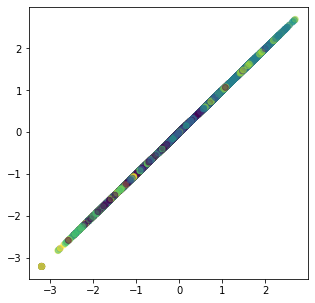

0 0


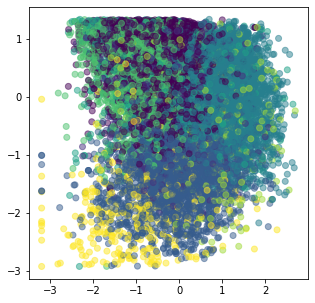

0 1


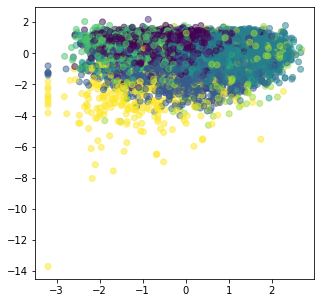

0 2


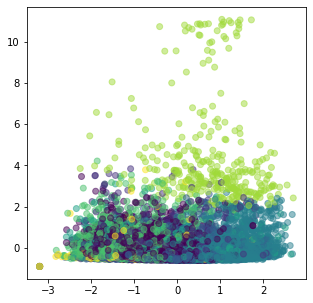

0 3


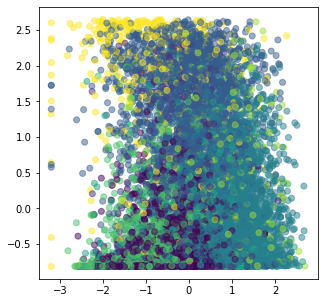

0 4


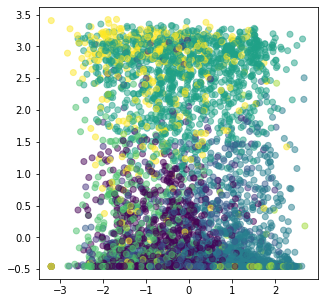

0 5


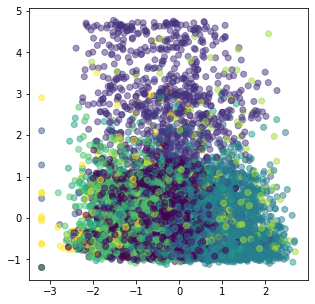

0 6


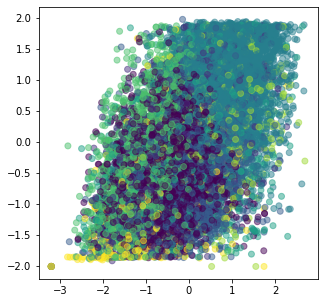

0 7


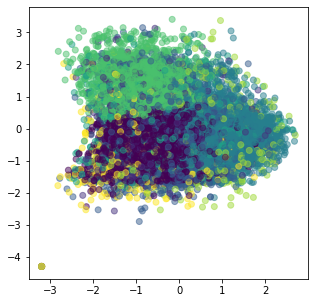

0 8


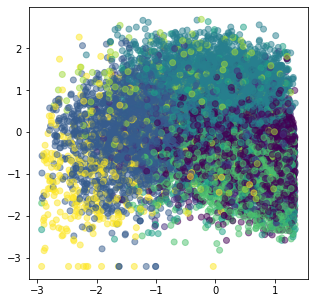

1 0


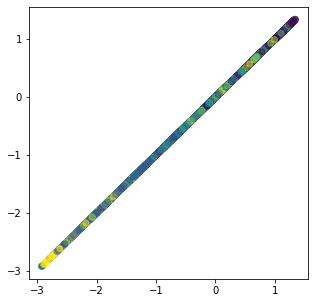

1 1


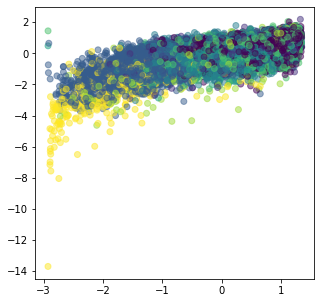

1 2


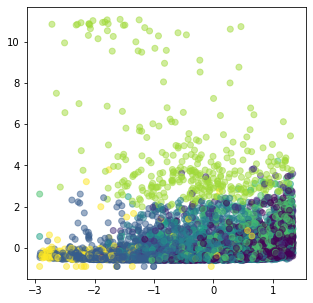

1 3


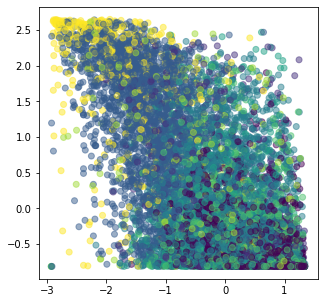

1 4


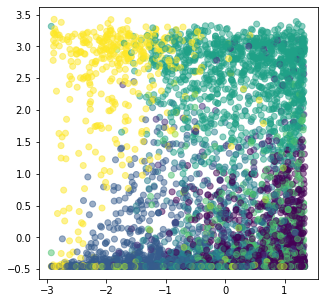

1 5


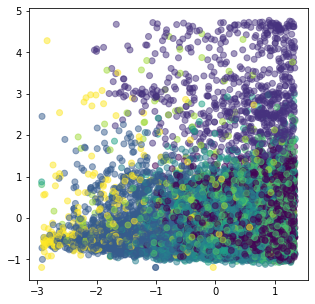

1 6


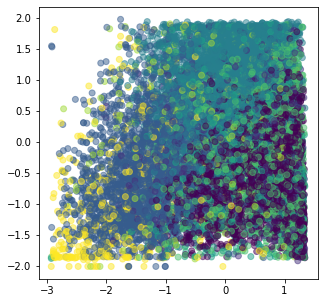

1 7


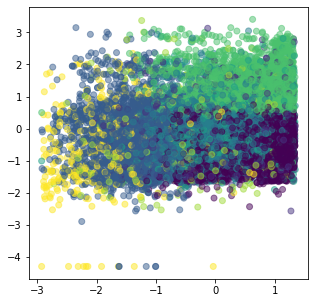

1 8


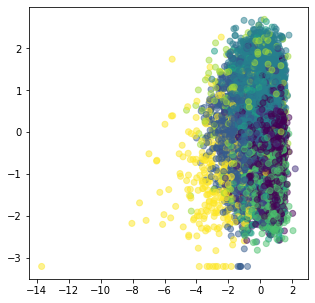

2 0


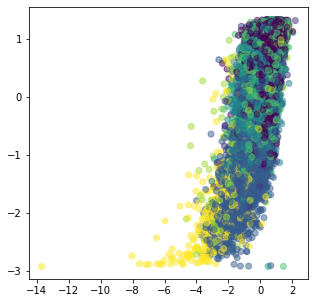

2 1


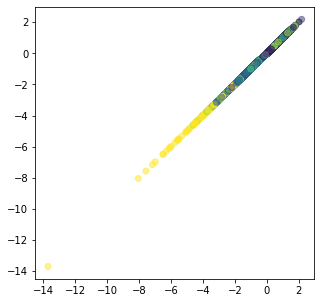

2 2


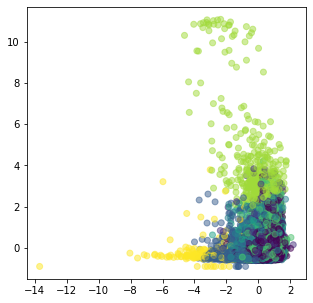

2 3


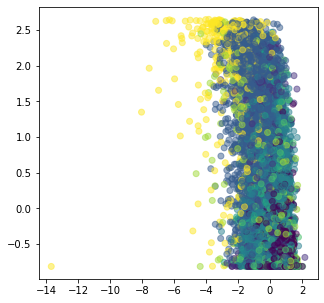

2 4


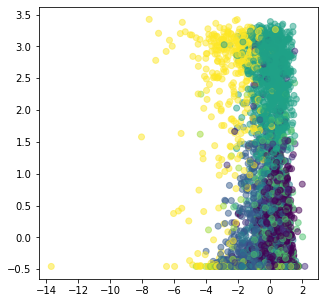

2 5


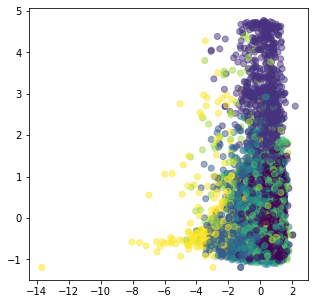

2 6


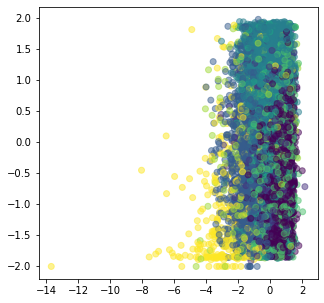

2 7


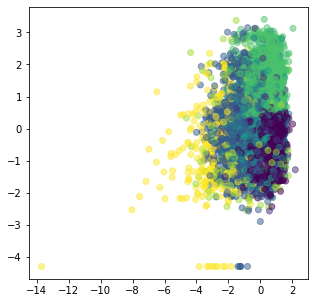

2 8


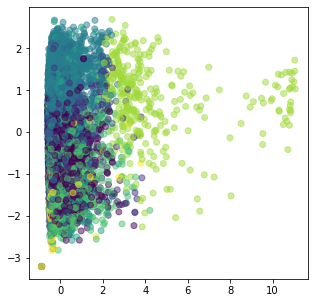

3 0


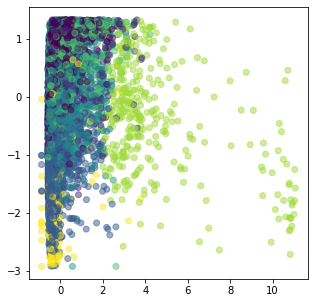

3 1


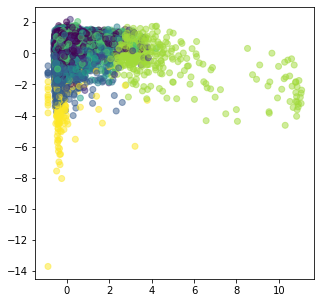

3 2


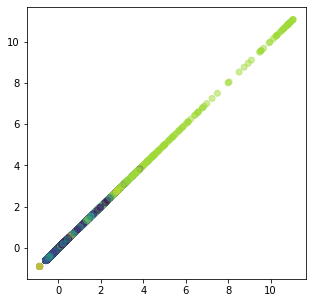

3 3


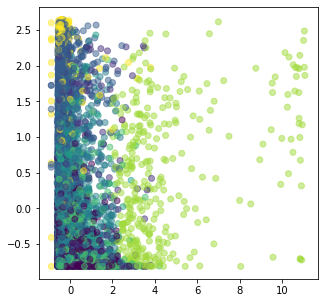

3 4


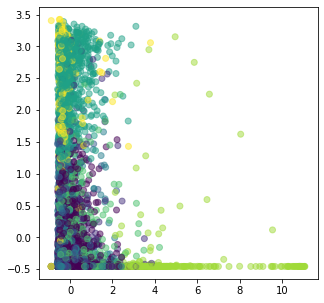

3 5


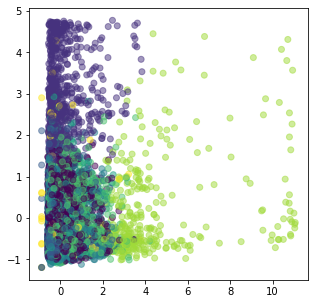

3 6


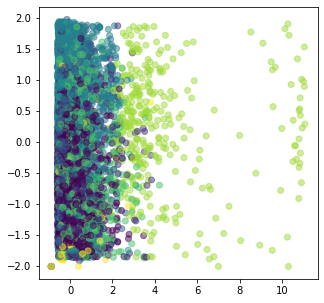

3 7


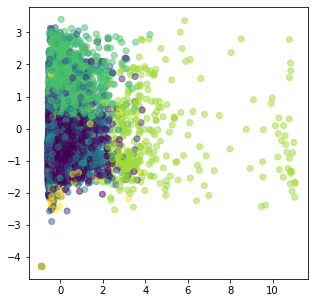

3 8


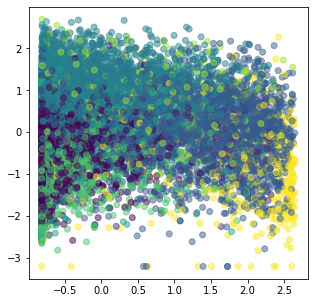

4 0


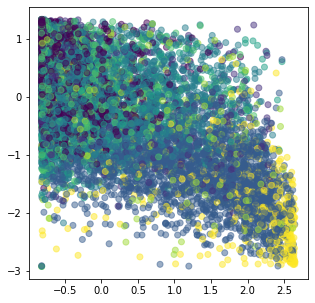

4 1


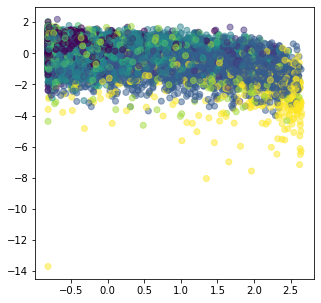

4 2


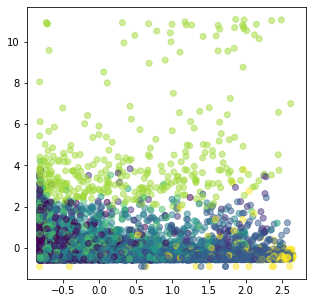

4 3


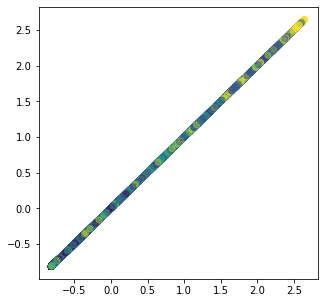

4 4


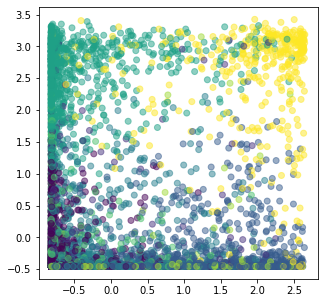

4 5


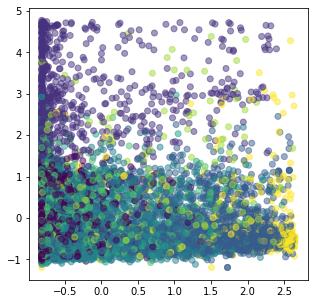

4 6


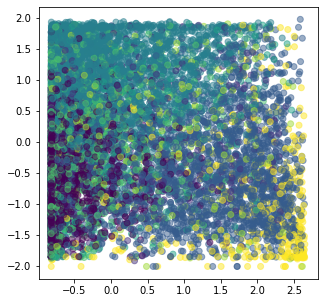

4 7


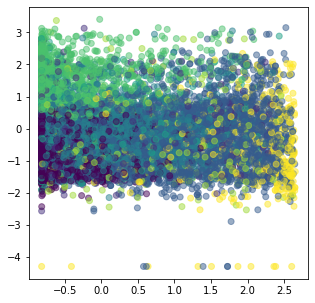

4 8


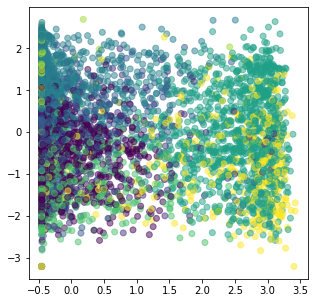

5 0


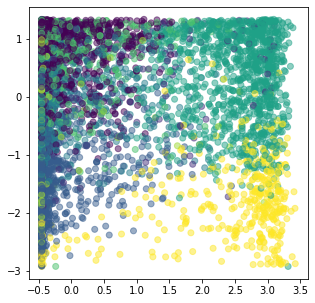

5 1


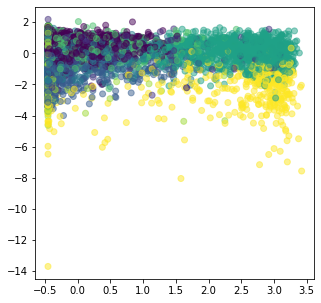

5 2


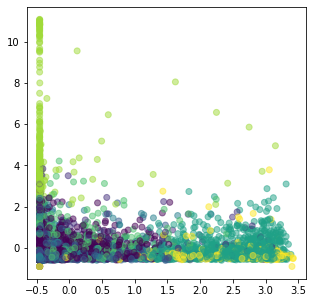

5 3


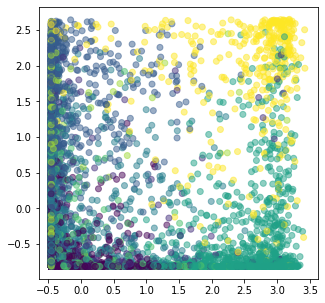

5 4


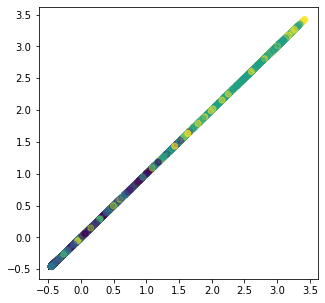

5 5


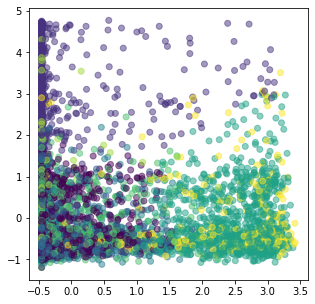

5 6


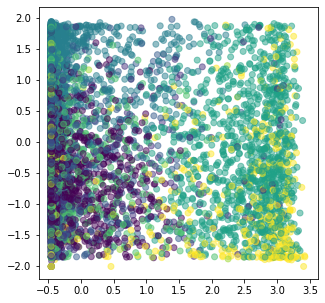

5 7


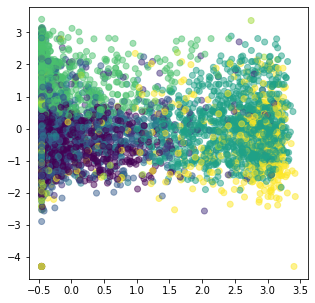

5 8


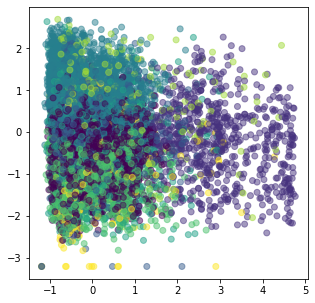

6 0


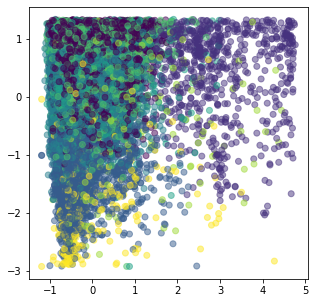

6 1


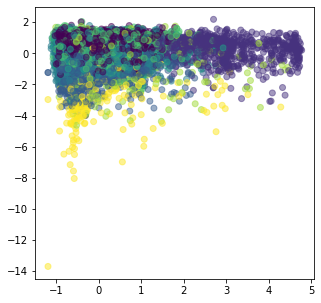

6 2


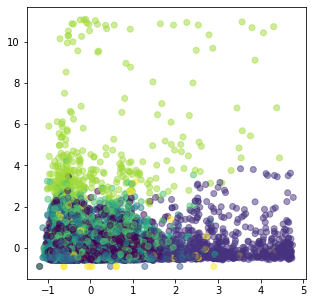

6 3


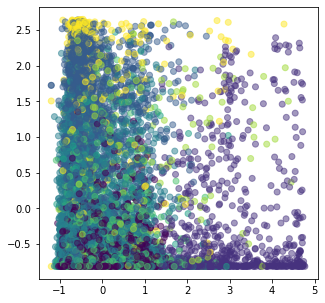

6 4


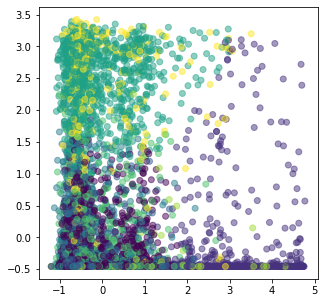

6 5


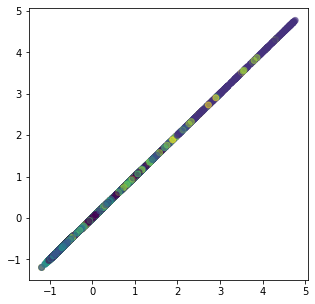

6 6


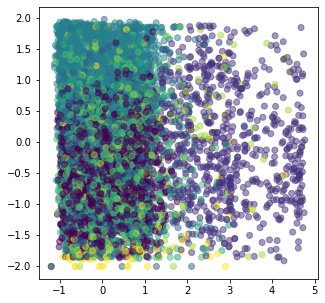

6 7


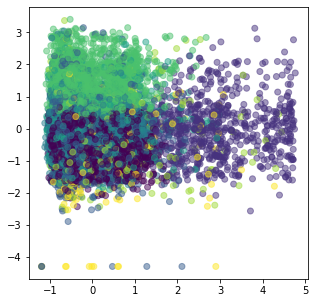

6 8


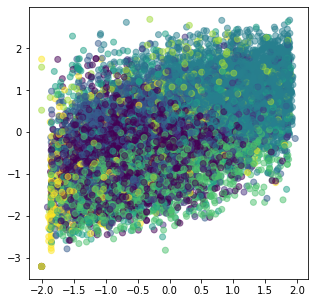

7 0


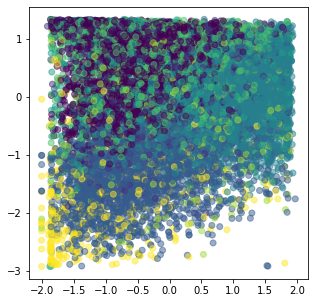

7 1


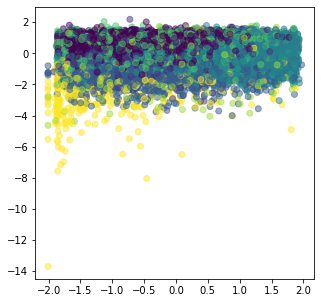

7 2


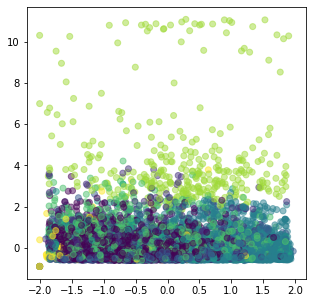

7 3


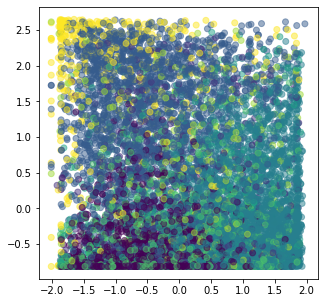

7 4


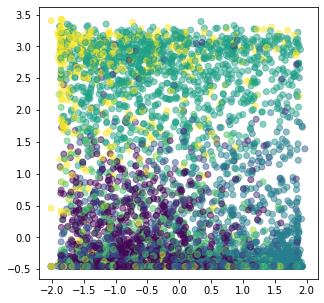

7 5


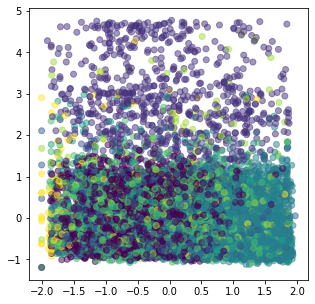

7 6


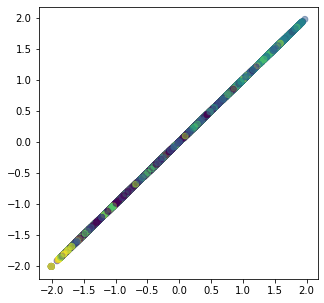

7 7


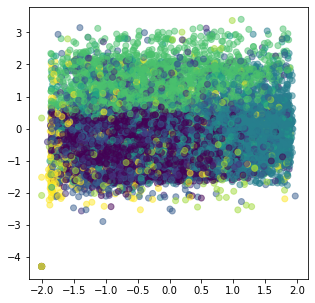

7 8


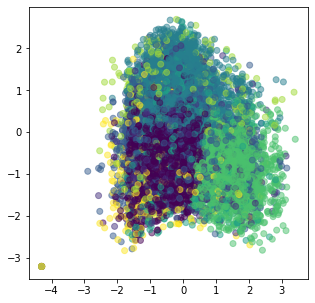

8 0


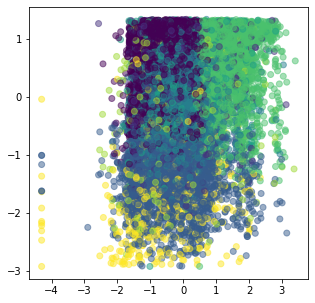

8 1


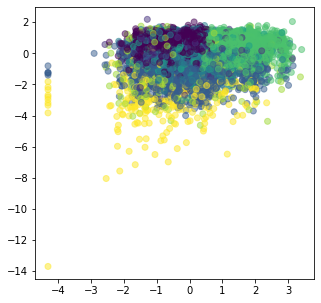

8 2


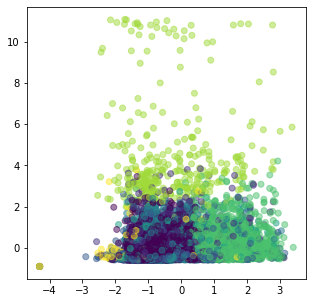

8 3


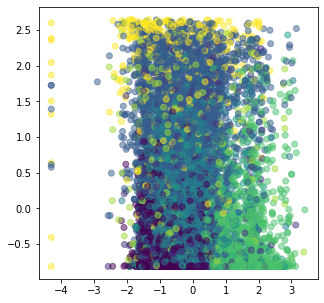

8 4


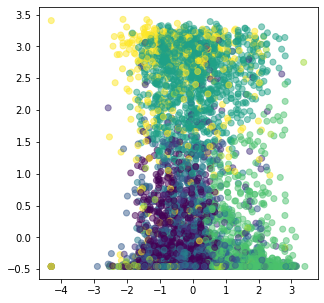

8 5


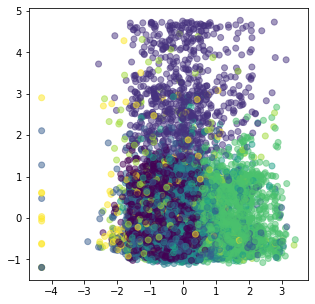

8 6


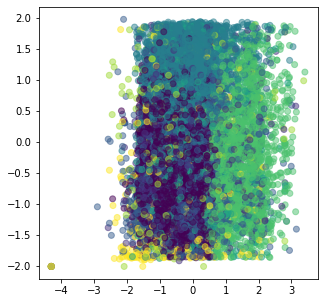

8 7


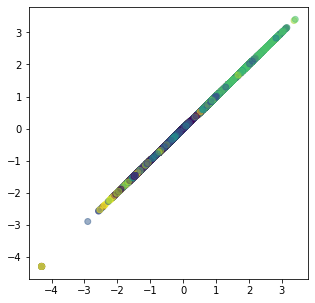

8 8


In [54]:
#loop through col names
for i in range(9):
    for j in range(9):
        plt.figure(figsize=(5, 5))
        plt.scatter(X_prep[:, i], X_prep[:, j],  c= clusters, alpha=0.5)
        plt.show()
        print(i,j)

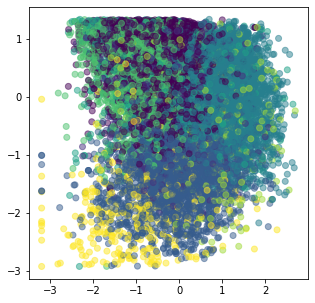

In [55]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.5)
plt.show()

It's still not very clear as to what the K number could be

**Look at the elbow Methods and Silhouette Scores to help determine the K number**

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

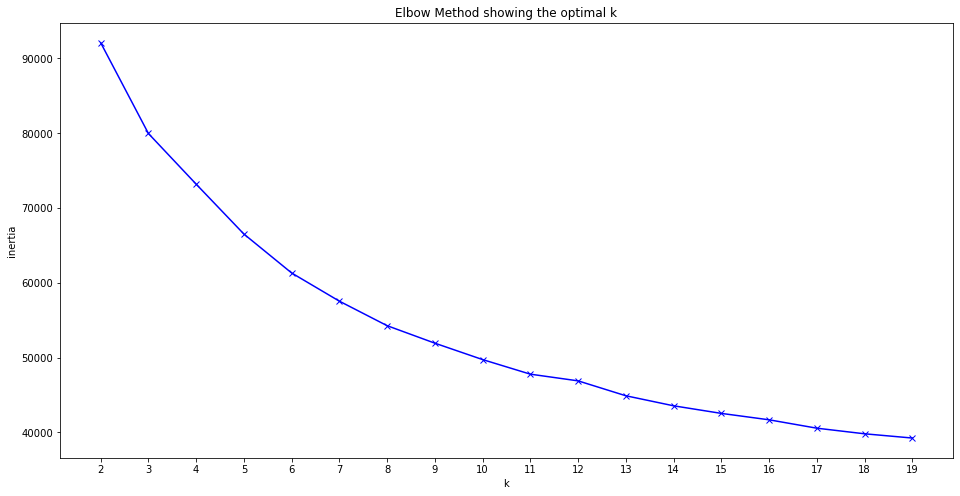

In [56]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans1 = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans1.fit(X_prep)
    inertia.append(kmeans1.inertia_)

    
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

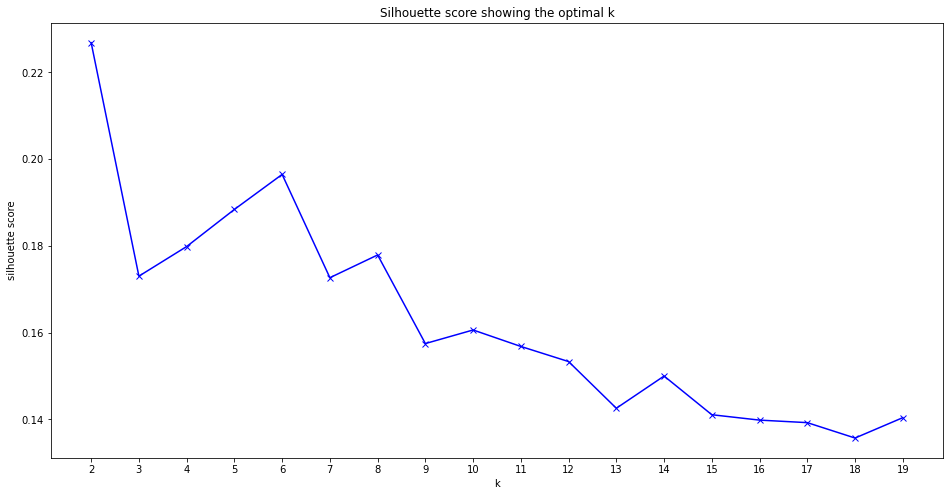

In [57]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans2 = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans2.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans2.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

**Difficult to see clusters so we run a PCA test**

**Here we check the Component Index to see what the best K number would be**

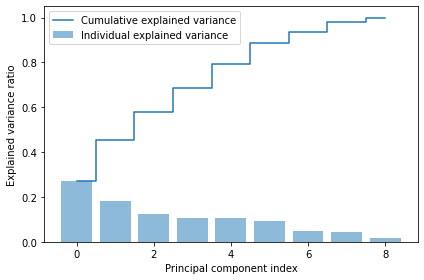

In [58]:
pca = PCA()
pca.fit(X_prep)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We decided on 8, as it begins to drop after

In [59]:
pca = PCA(8)
pca.fit(X_prep)

PCA(n_components=8)

In [60]:
pca.explained_variance_ratio_.sum()

0.9816063908944237

Here we see the PCA is quite high, exactly how we want it! 

**Now we Know that 8 is the ideal K number, we can once again fit our model (this time to the correct number)**

In [61]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [62]:
#We can check our cluster sizes
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    2767
1     721
2    2187
3    3305
4    1075
5    1802
6     336
7     402
dtype: int64

In [63]:
y.values

array([['A Kind Of Magic - Remastered 2011', 'Queen'],
       ['Bohemian Rhapsody - Remastered 2011', 'Queen'],
       ['Another One Bites The Dust - Remastered 2011', 'Queen'],
       ...,
       ["Isn't It Midnight", 'Fleetwood Mac'],
       ['When I See You Again', 'Fleetwood Mac'],
       ['You And I, Part II', 'Fleetwood Mac']], dtype=object)

**Assign the clusters to our original, cleaned/joined dataframe**

In [64]:
final_p['cluster'] = clusters
final_p['cluster'].unique()

array([3, 2, 1, 0, 5, 4, 6, 7], dtype=int32)

*Now we want to make sure our features in the final table are scaled*

In [65]:
final_p

artist                                          song  \
0              Queen             A Kind Of Magic - Remastered 2011   
1              Queen           Bohemian Rhapsody - Remastered 2011   
2              Queen  Another One Bites The Dust - Remastered 2011   
3              Queen           Don't Stop Me Now - Remastered 2011   
4              Queen              Under Pressure - Remastered 2011   
...              ...                                           ...   
12603  Fleetwood Mac                                     Mystified   
12604  Fleetwood Mac                    Welcome To The Room...Sara   
12605  Fleetwood Mac                             Isn't It Midnight   
12606  Fleetwood Mac                          When I See You Again   
12607  Fleetwood Mac                            You And I, Part II   

       danceability  energy  loudness  speechiness  acousticness  \
0             0.670  0.7760    -5.874       0.0356       0.01840   
1             0.414  0.4040    -9.928       0.0499       0.27100   
2             0.933  0.5280    -6.472       0.1610       0.11200   
3             0.559  0.8680    -5.276       0.1700       0.04750   
4             0.671  0.7120    -7.815       0.0476       0.42900   
...             ...     ...       ...          ...           ...   
12603         0.533  0.2510   -18.749       0.0275       0.73100   
12604         0.632  0.5550   -13.081       0.0409       0.11400   
12605         0.469  0.7300   -11.890       0.0358       0.00264   
12606         0.544  0.0907   -20.015       0.0268       0.87200   
12607         0.690  0.6270   -14.645       0.0363       0.06310   

       instrumentalness  liveness  valence    tempo  cluster  
0              0.002940    0.1280    0.703  130.128        3  
1              0.000000    0.3000    0.224   71.105        2  
2              0.312000    0.1630    0.754  109.967        3  
3              0.000176    0.7760    0.609  156.295        1  
4              0.000000    0.1030    0.462  113.805        3  
...                 ...       ...      ...      ...      ...  
12603          0.173000    0.0917    0.582  177.957        2  
12604          0.000003    0.2600    0.732   99.064        3  
12605          0.048200    0.1500    0.573  145.781        5  
12606          0.000000    0.1030    0.103   79.789        2  
12607          0.000019    0.0848    0.956  123.438        3  

[12595 rows x 12 columns]

In [66]:
final_p.to_csv('song_recommender_playlist_post-scaling.csv', index = False)

## Lab 5

In [67]:
fin = pd.read_csv('song_recommender_playlist_post-scaling.csv')
top = pd.read_csv('top.csv')

In [68]:
######Test To Work In Notebook######

def songrecommend():
    artist = input('Who is the artist: ')
    song = input('Give Me A Song: ')

    #come back and look through artists to loop and find all songs
    results = sp.search(q=song, type='track', limit=50)

    
    
    #print(results['tracks']['items'][0]['name'])
    counter = 0
    t = 0
    for i in results["tracks"]['items'][counter]:
        if song in list(top['track']):
            if artist in list(top['artist']):
                ron = random.randint(0,200)
                songs100 = top.iloc[ron]['track']
                artists100 = top.iloc[ron]['artist']
                print("!!HOT HOT HOT!! We Recommend you listen to",songs100,"by",artists100) 
                t += 1
                break
                
                
                
        elif artist in results["tracks"]['items'][counter]['album']['artists'][0]['name']:

            #Extract Song, Artist, and Features
            s = results["tracks"]['items'][counter]['name']
            a = results["tracks"]['items'][counter]['album']['artists'][0]['name']
            f = sp.audio_features(results["tracks"]['items'][counter]['uri'])
            
            #Put them into a dataframe
            df = pd.DataFrame({'artist': a, 'song': s, 'features': f})
            
            #Unpack the features and scale them
            dffeat = pd.json_normalize(df['features'])
            dffeat = dffeat[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']] 
            dffeatscaled = scaler.transform(dffeat)
            
            #Assign the song to a cluster, based on its features
            cluster = kmeans.predict(dffeatscaled)
            songrec = final_p[final_p['cluster'] == cluster[0]]

            #Recommend a Song from that cluster
            ran = random.randint(0,len(songrec))
            songs = songrec.iloc[ran]['song']
            artists = songrec.iloc[ran]['artist']
            print('We Recommend you listen to',songs,'by',artists)
            
            t += 1                  
            break
        else:
            pass

        counter += 1

    if t == 0:
        print("I'm sorry, we can't find that song")


In [69]:
songrecommend()

Who is the artist: David Bowie
Give Me A Song: Starman
We Recommend you listen to Summertime by DJ Jazzy Jeff & The Fresh Prince


In [70]:
songrecommend()

Who is the artist: Foo Fighters
Give Me A Song: all my life
We Recommend you listen to Frozen - Demo by Skid Row
